## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_of_mice = len(combined_data["Mouse ID"].value_counts())
num_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_df = pd.DataFrame(combined_data)

duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[combined_data_df["Mouse ID"].isin(duplicate_mice) == False]
clean_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_data_df["Mouse ID"].value_counts())
clean_mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = pd.DataFrame(clean_data_df.groupby('Drug Regimen').count())
summary_stats.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_stats['Mean Tumor Volume'] = pd.DataFrame(clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
#summary_stats.head()
summary_stats['Median Tumor Volume'] = pd.DataFrame(clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_stats['Standard Deviation Tumor Volume'] = pd.DataFrame(clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_stats['Variance Tumor Volume'] = pd.DataFrame(clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_stats['SEM Tumor Volume'] = pd.DataFrame(clean_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


# Assemble the resulting series into a single summary dataframe.
summary_stats_fin = summary_stats[['Mean Tumor Volume','Median Tumor Volume','Standard Deviation Tumor Volume',
                               'Variance Tumor Volume','SEM Tumor Volume']]
summary_stats.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Mean Tumor Volume,Median Tumor Volume,Standard Deviation Tumor Volume,Variance Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,,,,,,,,
Capomulin,230,230,230,230,230,230,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,178,178,178,178,178,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,178,178,178,178,178,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,188,188,188,188,188,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,186,186,186,186,186,186,54.331565,52.509285,8.134708,66.173479,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary = clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var',
                                                                                            'std','sem']})
agg_summary.head()                          
                           
                           

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Data Points'>

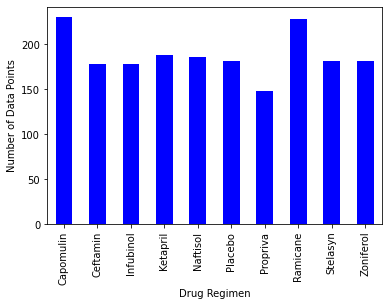

In [28]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_table = summary_stats [["Mouse ID",'Mean Tumor Volume','Median Tumor Volume','Standard Deviation Tumor Volume',
                               'Variance Tumor Volume','SEM Tumor Volume']]
bar_table=bar_table[["Mouse ID"]]
bar_table.head()

bar_table.plot(kind='bar', figsize = (6,4) , color='blue', legend = False , ylabel = ('Number of Data Points'))



Text(0, 0.5, 'Number of Data Points')

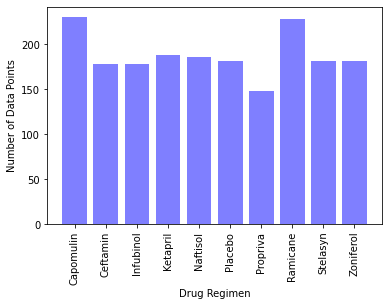

In [29]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(bar_table))
tick_loc = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, bar_table["Mouse ID"], color='blue', alpha=0.5)
plt.xticks(tick_loc, bar_table.index.values, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel("Number of Data Points")




<AxesSubplot:ylabel='Sex'>

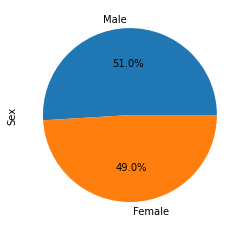

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = clean_data_df["Sex"].value_counts()
mice_sex.plot(kind='pie', autopct='%1.1f%%')


Text(0, 0.5, 'Sex')

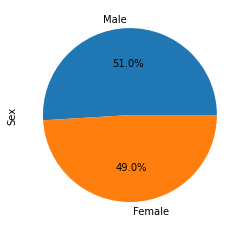

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex, autopct='%1.1f%%', labels=mice_sex.index.values)
plt.ylabel('Sex')




## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

sorted_df = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()
sorted_df = sorted_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(sorted_df , clean_data_df, on=["Mouse ID", "Timepoint"], how='left')
merged_df.sort_index()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in drug_regimens:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_volume.append(tumor)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier = [x for x in tumor if (x>upper_bound)|(x<lower_bound)]
    print(f'{treatment} potential outliers: {outlier}')

    
    

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.321345799999996]
Ceftamin potential outliers: []


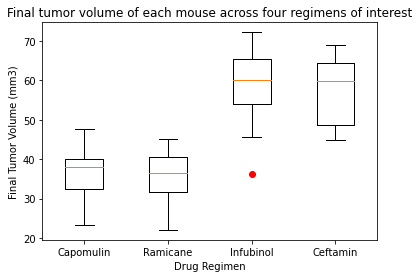

In [92]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final tumor volume of each mouse across four regimens of interest")
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume, labels = drug_regimens, sym='r')
plt.xticks([1,2,3,4], drug_regimens)

plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
